# Segmenting a Moray Eel in a Reef

In [1]:
import cv2
import matplotlib.pyplot as plt
from skimage import morphology
from skimage.segmentation import clear_border
from scipy.ndimage import binary_fill_holes
from skimage.morphology import disk
import numpy as np

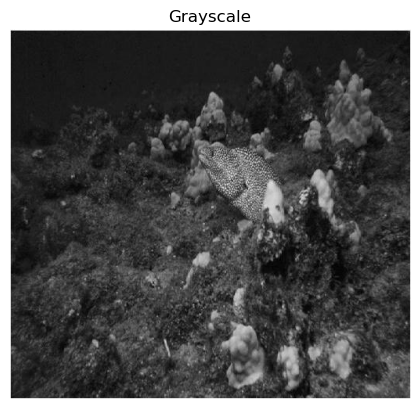

In [2]:
reef = cv2.imread("./images/reefGS.jpg", cv2.IMREAD_GRAYSCALE)

plt.imshow(reef, cmap='gray')
plt.title('Grayscale')
plt.axis('off')
plt.show()

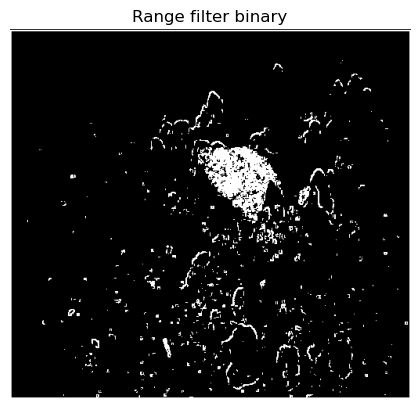

In [3]:
reef_range = cv2.morphologyEx(reef, cv2.MORPH_GRADIENT, kernel=cv2.getStructuringElement(cv2.MORPH_RECT, ksize=(3, 3))) # Range filter
reef_range = reef_range / reef_range.max()
_, reef_range_binary = cv2.threshold(reef_range, 0.275, 1, cv2.THRESH_BINARY)

plt.imshow(reef_range_binary, cmap='gray')
plt.title('Range filter binary')
plt.axis('off')
plt.show()

This moray eel does not stand out well against the reef. Applying a range filter can get us a rough segmentation of the eel, but it needs some work to segment the entire eel and only the eel.
A lot of edges were detected because of a relatively large change in intensity between elements on the reef. These are all relatively small areas of foreground. Let's remove noise from binary image.

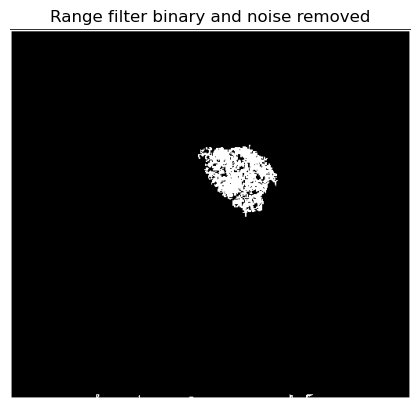

In [4]:
reef_range_binary_clean = morphology.remove_small_objects(reef_range_binary.astype('bool'), 300)

plt.imshow(reef_range_binary_clean, cmap='gray')
plt.title("Range filter binary and noise removed")
plt.axis('off')
plt.show()

There was a small amount of foreground along the border, let's remove it.

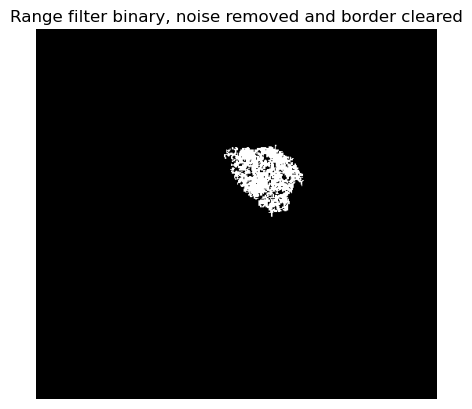

In [5]:
reef_range_binary_clean_clear = clear_border(reef_range_binary_clean)

plt.imshow(reef_range_binary_clean_clear, cmap='gray')
plt.title("Range filter binary, noise removed and border cleared")
plt.axis('off')
plt.show()

Fill the holes in the binary image.

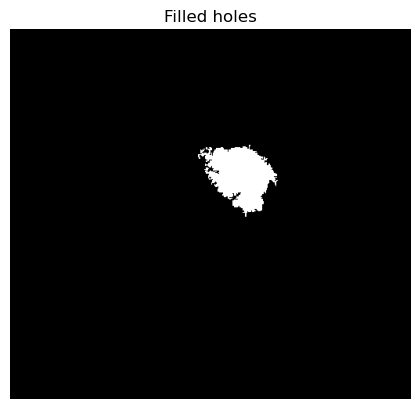

In [6]:
reef_range_binary_clean_clear_fill = binary_fill_holes(reef_range_binary_clean_clear)

plt.imshow(reef_range_binary_clean_clear_fill, cmap='gray')
plt.title("Filled holes")
plt.axis('off')
plt.show()

Opening operation.

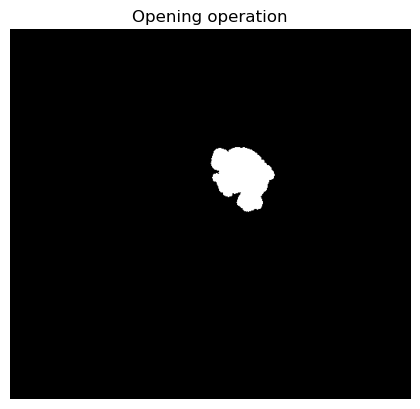

In [7]:
structuring_element = disk(5)
reef_range_binary_clean_clear_fill_open = cv2.morphologyEx(reef_range_binary_clean_clear_fill.astype(np.uint8), cv2.MORPH_OPEN, structuring_element)

plt.imshow(reef_range_binary_clean_clear_fill_open, cmap='gray')
plt.title("Opening operation")
plt.axis('off')
plt.show()

Closing operation.

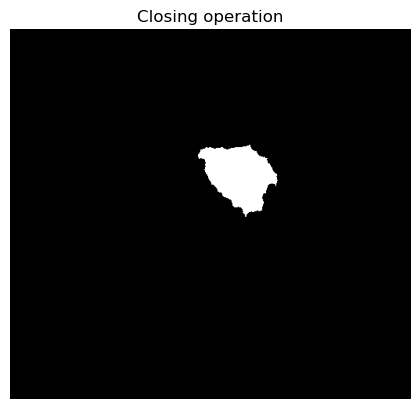

In [8]:
reef_range_binary_clean_clear_fill_open_close = cv2.morphologyEx(reef_range_binary_clean_clear_fill.astype(np.uint8), cv2.MORPH_CLOSE, structuring_element)

plt.imshow(reef_range_binary_clean_clear_fill_open_close, cmap='gray')
plt.title("Closing operation")
plt.axis('off')
plt.show()